In [ ]:
##

In [517]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as sd
from sklearn.tree import DecisionTreeClassifier as DT

In [518]:
data = pd.read_csv('train_ctrUa4K.csv')

In [519]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [520]:
data.isnull().mean() * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### Exploratory Data Analysis

#### Relation between the loan approved vs Gender

In [521]:
data['Dependents'].value_counts(),data['Education'].value_counts()

(0     345
 1     102
 2     101
 3+     51
 Name: Dependents, dtype: int64, Graduate        480
 Not Graduate    134
 Name: Education, dtype: int64)

In [522]:
d1['Self_Employed'].value_counts()

No     343
Yes     56
Name: Self_Employed, dtype: int64

In [523]:
d1['Self_Employed'].value_counts().index

Index(['No', 'Yes'], dtype='object')

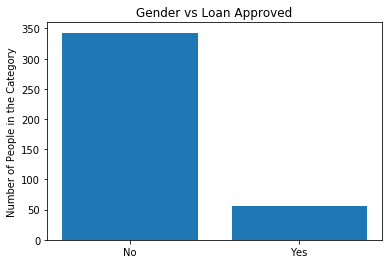

In [524]:
plt.bar([1,2],d1['Self_Employed'].value_counts().values)
plt.xticks([1,2],d1['Self_Employed'].value_counts().index)
plt.title("Gender vs Loan Approved")
plt.ylabel("Number of People in the Category")
plt.show()

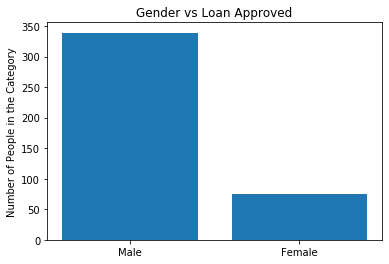

In [525]:
plt.bar([1,2],d1['Gender'].value_counts().values)
plt.xticks([1,2],d1['Gender'].value_counts().index)
plt.title("Gender vs Loan Approved")
plt.ylabel("Number of People in the Category")
plt.show()

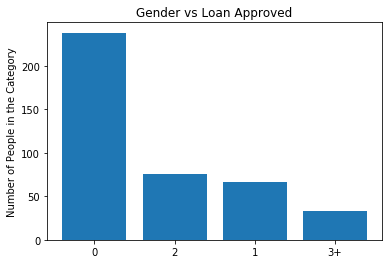

In [526]:
plt.bar([1,2,3,4],d1['Dependents'].value_counts().values)
plt.xticks([1,2,3,4],d1['Dependents'].value_counts().index)
plt.title("Gender vs Loan Approved")
plt.ylabel("Number of People in the Category")
plt.show()

### Filling the NAN values

In [527]:
data['Gender'] = data['Gender'].fillna('Unknown')

In [528]:
datat = pd.read_csv('test_lAUu6dG.csv')

In [529]:
datat['Gender'] = datat['Gender'].fillna('Unknown')

In [530]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(data['Gender'].values.reshape(-1,1))
traingender = enc.transform(data['Gender'].values.reshape(-1,1))
testgender = enc.transform(datat['Gender'].values.reshape(-1,1))

#### filling nan in married column

In [531]:
datat['Married'] = datat['Married'].fillna('Unknown')
data['Married'] = data['Married'].fillna('Unknown')

In [532]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(data['Married'].values.reshape(-1,1))
trainmarried = enc.transform(data['Married'].values.reshape(-1,1))
testmarried = enc.transform(datat['Married'].values.reshape(-1,1))

In [533]:
datat['Dependents'] = datat['Dependents'].fillna('Unknown')
data['Dependents'] = data['Dependents'].fillna('Unknown')

In [534]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(data['Dependents'].values.reshape(-1,1))
traindep = enc.transform(data['Dependents'].values.reshape(-1,1))
testdep = enc.transform(datat['Dependents'].values.reshape(-1,1))

In [535]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(data['Education'].values.reshape(-1,1))
trainedu = enc.transform(data['Education'].values.reshape(-1,1))
testedu = enc.transform(datat['Education'].values.reshape(-1,1))

In [536]:
datat['Self_Employed'] = datat['Self_Employed'].fillna('Unknown')
data['Self_Employed'] = data['Self_Employed'].fillna('Unknown')

In [537]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(data['Self_Employed'].values.reshape(-1,1))
trainemp = enc.transform(data['Self_Employed'].values.reshape(-1,1))
testemp = enc.transform(datat['Self_Employed'].values.reshape(-1,1))

In [538]:
datat['ApplicantIncome'] = datat['ApplicantIncome'].fillna(data['ApplicantIncome'].mean())
data['ApplicantIncome'] = data['ApplicantIncome'].fillna(data['ApplicantIncome'].mean())

In [539]:
datat['CoapplicantIncome'] = datat['CoapplicantIncome'].fillna(data['CoapplicantIncome'].mean())
data['CoapplicantIncome'] = data['CoapplicantIncome'].fillna(data['CoapplicantIncome'].mean())

In [540]:
datat['LoanAmount'] = datat['LoanAmount'].fillna(data['LoanAmount'].mean())
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [541]:
datat['Credit_History'] = datat['Credit_History'].fillna(2.0)
data['Credit_History'] = data['Credit_History'].fillna(2.0)

In [542]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(data['Credit_History'].values.reshape(-1,1))
trainhis = enc.transform(data['Credit_History'].values.reshape(-1,1))
testhis = enc.transform(datat['Credit_History'].values.reshape(-1,1))

In [543]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(data['Property_Area'].values.reshape(-1,1))
trainarea = enc.transform(data['Property_Area'].values.reshape(-1,1))
testarea = enc.transform(datat['Property_Area'].values.reshape(-1,1))

In [544]:
trainarea = trainarea.todense()
testarea = testarea.todense()
trainhis = trainhis.todense()
testhis = testhis.todense()
trainemp = trainemp.todense()
testemp = testemp.todense()
trainedu = trainedu.todense()
testedu = testedu.todense()
trainmarried = trainmarried.todense()
testmarried = testmarried.todense()
traingender = traingender.todense()
testgender = testgender.todense()

In [545]:
traindep = traindep.todense()
testdep = testdep.todense()

In [546]:
### history, loan amount, credit history, loan status

In [565]:
traindata = np.concatenate([trainarea,trainhis,trainemp,trainedu,trainmarried,traingender,traindep],axis=1)

In [566]:
testdata = np.concatenate([testarea,testhis,testemp,testedu,testmarried,testgender,testdep],axis=1)

In [567]:
tx,txt = data[['LoanAmount','CoapplicantIncome','ApplicantIncome']].values,datat[['LoanAmount','CoapplicantIncome','ApplicantIncome']].values

In [568]:
tx.shape,txt.shape,traindata.shape,testdata.shape

((614, 3), (367, 3), (614, 22), (367, 22))

In [569]:
X_train = np.concatenate([traindata,tx],axis=1)
X_test = np.concatenate([testdata,txt],axis=1)

In [570]:
X_train.shape,X_test.shape

((614, 25), (367, 25))

In [571]:
y_train = data['Loan_Status'].values

### Normalizing the entire datset

In [573]:
m = sd()
X_train = m.fit_transform(X_train)
X_test = m.transform(X_test)

In [595]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train,y_train, test_size=0.20, random_state=42)

In [578]:
for d in [3,4,5,6,7,8,9]:
    for s in [3,4,5,6,7,8,9,10]:
        model = DT(max_depth = d,min_samples_split=s)
        model.fit(X_train1,y_train1)
        y_pred = model.predict(X_test1)
        y_pred1 = model.predict(X_train1)
        #y_pred = cal(y_pred,v)
        #y_pred1 = cal(y_pred1,v)
        print(accuracy_score(y_test1,y_pred))
        print(accuracy_score(y_train1,y_pred1))
        print(confusion_matrix(y_test1,y_pred))

0.7886178861788617
0.8207739307535642
[[18 25]
 [ 1 79]]
0.7886178861788617
0.8207739307535642
[[18 25]
 [ 1 79]]
0.7886178861788617
0.8207739307535642
[[18 25]
 [ 1 79]]
0.7886178861788617
0.8207739307535642
[[18 25]
 [ 1 79]]
0.7886178861788617
0.8207739307535642
[[18 25]
 [ 1 79]]
0.7886178861788617
0.8207739307535642
[[18 25]
 [ 1 79]]
0.7886178861788617
0.8207739307535642
[[18 25]
 [ 1 79]]
0.7886178861788617
0.8207739307535642
[[18 25]
 [ 1 79]]
0.7886178861788617
0.8207739307535642
[[18 25]
 [ 1 79]]
0.7886178861788617
0.8207739307535642
[[18 25]
 [ 1 79]]
0.7886178861788617
0.8207739307535642
[[18 25]
 [ 1 79]]
0.7886178861788617
0.8207739307535642
[[18 25]
 [ 1 79]]
0.7886178861788617
0.8207739307535642
[[18 25]
 [ 1 79]]
0.7886178861788617
0.8207739307535642
[[18 25]
 [ 1 79]]
0.7886178861788617
0.8207739307535642
[[18 25]
 [ 1 79]]
0.7886178861788617
0.8207739307535642
[[18 25]
 [ 1 79]]
0.7642276422764228
0.8309572301425662
[[16 27]
 [ 2 78]]
0.7642276422764228
0.8309572301

### Tunning of Logistic Regression Model

In [581]:
for v in [.002,.0011,.0012,.0013,.0014]:
    model = LR(C = v,penalty = 'l2')
    model.fit(X_train1,y_train1)
    y_pred = model.predict(X_test1)
    y_pred1 = model.predict(X_train1)
    #y_pred = cal(y_pred,v)
    #y_pred1 = cal(y_pred1,v)
    print(accuracy_score(y_test1,y_pred))
    print(accuracy_score(y_train1,y_pred1))
    print(confusion_matrix(y_test1,y_pred))
    print("==================================")

0.7967479674796748
0.8085539714867617
[[20 23]
 [ 2 78]]
0.7886178861788617
0.7963340122199593
[[20 23]
 [ 3 77]]
0.7967479674796748
0.7963340122199593
[[20 23]
 [ 2 78]]
0.7967479674796748
0.8004073319755601
[[20 23]
 [ 2 78]]
0.7967479674796748
0.8004073319755601
[[20 23]
 [ 2 78]]


C:\Users\karan\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\karan\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\karan\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\karan\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\karan\AppData\Local\Programs\Python\Python36\lib\si

In [582]:
def cal(prob,thres):
    pred = []
    for val in prob:
        if val[0]>thres:
            pred.append('Y')
        else:
            pred.append('N')
    return pred

In [583]:
from xgboost import XGBClassifier as xgb 
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as gnb
#from sklearn.naive_bayes import MultinomialNB as gnb

In [585]:
opt,optt,depth,est,sp = 0,0,0,0,0
for d in [3,4,5,6,7,8,9]:
    for k in [3,4,5,6,7,8,9]:
        for s in [5,10,15]:
            model = rf(max_depth = 4,n_estimators = 3,min_samples_split=5)
            model.fit(X_train,y_train)
            y_pred = model.predict(X_test1)
            y_pred1 = model.predict(X_train1)
            #y_pred = cal(y_pred,v)
            #y_pred1 = cal(y_pred1,v)
            a,a1=accuracy_score(y_test1,y_pred),accuracy_score(y_train1,y_pred1)
            print(accuracy_score(y_test1,y_pred))
            print(accuracy_score(y_train1,y_pred1))
            print(confusion_matrix(y_test1,y_pred))
            print("==================================")
            if opt<a:
                opt =a
                optt=a1
                depth = d
                est = k
                sp = s

0.7967479674796748
0.814663951120163
[[19 24]
 [ 1 79]]
0.7886178861788617
0.8187372708757638
[[18 25]
 [ 1 79]]
0.7967479674796748
0.814663951120163
[[20 23]
 [ 2 78]]
0.7886178861788617
0.8187372708757638
[[18 25]
 [ 1 79]]
0.6829268292682927
0.7230142566191446
[[ 4 39]
 [ 0 80]]
0.8048780487804879
0.8126272912423625
[[20 23]
 [ 1 79]]
0.7886178861788617
0.8126272912423625
[[18 25]
 [ 1 79]]
0.8130081300813008
0.8228105906313645
[[21 22]
 [ 1 79]]
0.7967479674796748
0.8065173116089613
[[20 23]
 [ 2 78]]
0.8048780487804879
0.8187372708757638
[[22 21]
 [ 3 77]]
0.7886178861788617
0.8187372708757638
[[18 25]
 [ 1 79]]
0.7967479674796748
0.8187372708757638
[[19 24]
 [ 1 79]]
0.7723577235772358
0.824847250509165
[[19 24]
 [ 4 76]]
0.7967479674796748
0.8126272912423625
[[19 24]
 [ 1 79]]
0.7967479674796748
0.8228105906313645
[[19 24]
 [ 1 79]]
0.8130081300813008
0.8268839103869654
[[22 21]
 [ 2 78]]
0.8130081300813008
0.8187372708757638
[[20 23]
 [ 0 80]]
0.7723577235772358
0.8105906313645

0.7886178861788617
0.814663951120163
[[18 25]
 [ 1 79]]
0.7886178861788617
0.8207739307535642
[[18 25]
 [ 1 79]]
0.7804878048780488
0.8126272912423625
[[17 26]
 [ 1 79]]
0.8211382113821138
0.814663951120163
[[21 22]
 [ 0 80]]
0.8211382113821138
0.8065173116089613
[[21 22]
 [ 0 80]]
0.7723577235772358
0.7922606924643585
[[16 27]
 [ 1 79]]
0.8048780487804879
0.8207739307535642
[[20 23]
 [ 1 79]]
0.7804878048780488
0.8167006109979633
[[18 25]
 [ 2 78]]
0.7886178861788617
0.8187372708757638
[[18 25]
 [ 1 79]]
0.7967479674796748
0.8207739307535642
[[18 25]
 [ 0 80]]
0.7886178861788617
0.8167006109979633
[[20 23]
 [ 3 77]]
0.8048780487804879
0.8228105906313645
[[19 24]
 [ 0 80]]
0.8130081300813008
0.8207739307535642
[[20 23]
 [ 0 80]]
0.7967479674796748
0.814663951120163
[[18 25]
 [ 0 80]]
0.7886178861788617
0.814663951120163
[[18 25]
 [ 1 79]]
0.7804878048780488
0.8065173116089613
[[17 26]
 [ 1 79]]
0.8130081300813008
0.8207739307535642
[[20 23]
 [ 0 80]]
0.8048780487804879
0.82688391038696

In [592]:
for v in [.002,.0011,.0012,.0013,.0014]:
    model = LR(C = .0012,penalty = 'l2')
    model.fit(X_train1,y_train1)
    y_pred = model.predict(X_test1)
    y_pred1 = model.predict(X_train1)
    #y_pred = cal(y_pred,v)
    #y_pred1 = cal(y_pred1,v)
    #print(accuracy_score(y_test1,y_pred))
    #print(accuracy_score(y_train1,y_pred1))
    #print(confusion_matrix(y_test1,y_pred))
    #print("==================================")

C:\Users\karan\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\karan\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\karan\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\karan\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\karan\AppData\Local\Programs\Python\Python36\lib\si

In [596]:
y_pred1 = model.predict(X_test1)

In [597]:
accuracy_score(y_test1,y_pred)

0.7967479674796748

In [ ]:
## Prediction on the given test data:

In [598]:
y_pred = model.predict(X_test)

In [599]:
dp = datat['Loan_ID']

In [600]:
dp = pd.read_csv('sample.csv')

In [601]:
dp['Loan_Status'] = y_pred

In [602]:
dp.to_csv('Submit.csv',index=False)

In [603]:
dp = pd.read_csv('Submit.csv')

In [604]:
dp

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [ ]:
## Now you can submit the Submit.csv File,